# 1. Random Graphs
The following is the implement the three random graph models


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [3]:
def erdosRenyi(n, p):
  # Create the starting graph with n nodes and no edges
  G = nx.empty_graph(n)
  for i in range(n):
    for j in range(i + 1, n):
      draw = np.random.rand()
      if (draw <= p):
        G.add_edge(i, j)
  return G

def wattsStrogatz(n, k, beta):
  # Create the starting ring
  G = nx.Graph()
  edges_list = []
  for i in range(n):
    for j in range(i + 1, (i + (k // 2) + 1)):
      edges_list.append([i, j % n])
  G.add_edges_from(edges_list)

  # Replace the right neighbors with random nodes
  for i in range(n):
    for j in range(i + 1, (i + (k // 2) + 1)):
      p = np.random.random()
      if (p <= beta):
        choices = np.delete(np.arange(n), i) # We have to exclude self loops
        choice = np.random.choice(choices)
        G.remove_edge(i, j % n)
        G.add_edge(i, choice)
  return G

def barabasiAlbert(n, l):
  # Create the starting graph, which is a multigraph in order to make probabilities sum up to 1
  G = nx.MultiGraph()
  G.add_node(1)

  # Add the nodes and edges towards other nodes with probability depending proportional to their degree
  for t in range(1, n):
    G.add_node(t)
    if (t == 1):
      for j in range(l):
        G.add_edge(t, 0)
    else:
      degrees = dict(nx.degree(G))
      node_probabilities = {key: value/(2 * (t - 1) * l) for key, value in degrees.items()}
      for j in range(l):
        choice = np.random.choice(list(node_probabilities.keys()), p=list(node_probabilities.values()))
        G.add_edge(t, choice)

  # Return the graph converted from the multigraph
  return nx.Graph(G)

In [4]:
# We define some functions to compute some metrics (diameter, clustering coefficient, plots) given a graph
def degreeDistribution(G, model_name):
  nodes_degree = sorted((degree for node, degree in G.degree()), reverse=True)
  max_degree = max(nodes_degree)
  degree, count = np.unique(nodes_degree, return_counts=True)
  sorted_indices = np.argsort(-count)
  degree = degree[sorted_indices]
  count = count[sorted_indices]

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
  fig.subplots_adjust(wspace=0.3)
  fig.suptitle(model_name)

  ax1.plot(nodes_degree)
  ax1.set_xlabel('Node')
  ax1.set_ylabel('Degree')
  ax1.set_title('Nodes Degrees')

  ax2.bar(degree, count)
  ax2.set_xlabel('Degree')
  ax2.set_ylabel('Number of Nodes')
  ax2.set_title('Degree Distribution')

  plt.show()

def clusteringCoefficient(G):
  connected_components = nx.connected_components(G)
  clustering_coefficients = []
  for component in connected_components:
      subgraph = G.subgraph(component)
      clustering_coefficient = nx.average_clustering(subgraph)
      clustering_coefficients.append(clustering_coefficient)

  average_clustering = sum(clustering_coefficients) / len(clustering_coefficients)
  return average_clustering
  '''
  coeffs = nx.clustering(G)
  return sum(list(coeffs.values()))/len(G.nodes())
  '''

def diameter(G):
  connected_components = nx.connected_components(G)
  diameters = []
  for component in connected_components:
      subgraph = G.subgraph(component)
      diameter = nx.diameter(subgraph)
      diameters.append(diameter)

  return max(diameters)


def computeMetrics(G, model_name):
  degreeDistribution(G, model_name)
  print(G)
  print(f'Diameter: {diameter(G)}')
  print(f'Clustering coefficient: {clusteringCoefficient(G)}\n')

In [6]:
for beta in np.arange(0.3, 1, 0.3):
  for k in [2, 10, 25]:
    print( (3 * (k - 2)) / (4 * (k - 1)) * (1 - beta) ** 3)

0.0
0.2286666666666666
0.24653124999999995
0.0
0.04266666666666667
0.04600000000000001
0.0
0.0006666666666666684
0.0007187500000000019


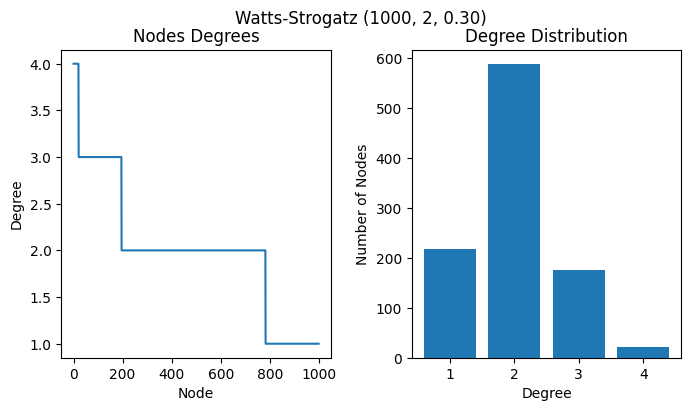

Graph with 1000 nodes and 1000 edges
Diameter: 127
Clustering coefficient: 0.0



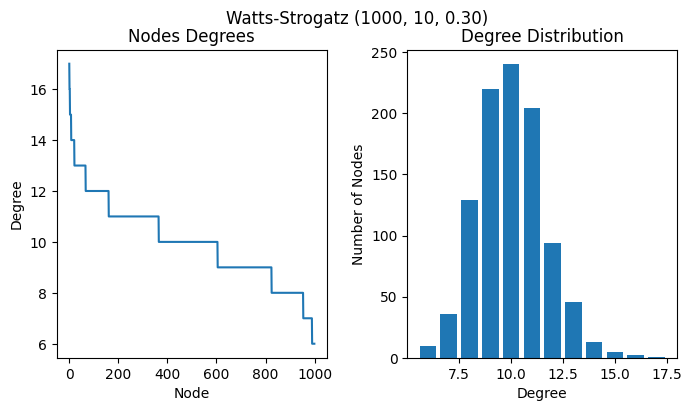

Graph with 1000 nodes and 5000 edges
Diameter: 6
Clustering coefficient: 0.23703709770621534



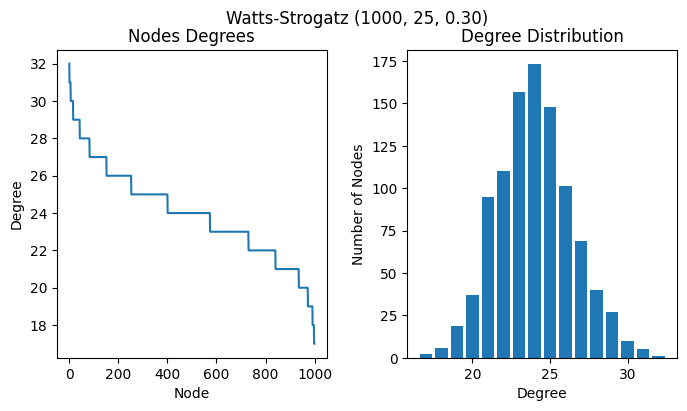

Graph with 1000 nodes and 12000 edges
Diameter: 4
Clustering coefficient: 0.2546614521573596



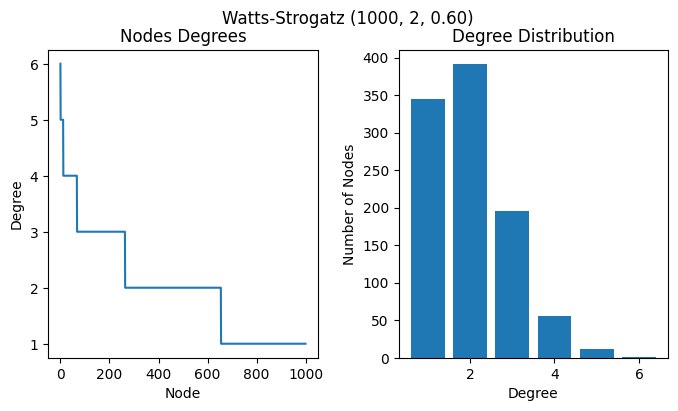

Graph with 1000 nodes and 1000 edges
Diameter: 75
Clustering coefficient: 0.0



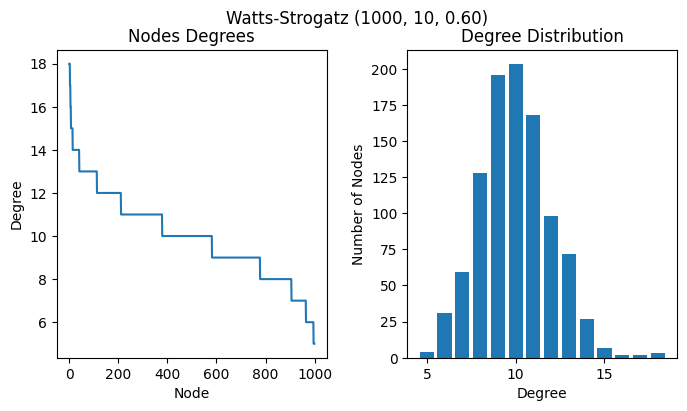

Graph with 1000 nodes and 5000 edges
Diameter: 5
Clustering coefficient: 0.05025912453559543



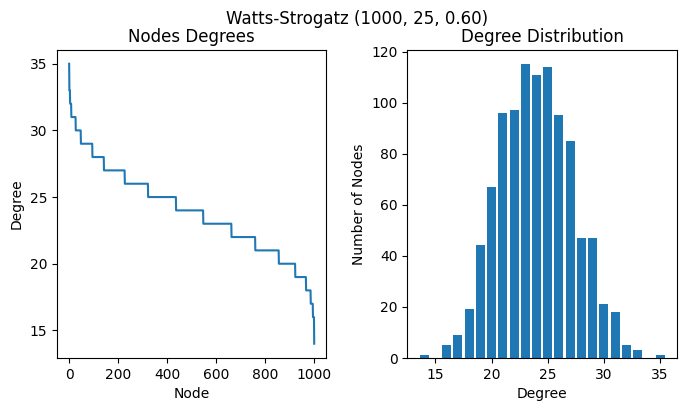

Graph with 1000 nodes and 12000 edges
Diameter: 4
Clustering coefficient: 0.0674776463131817



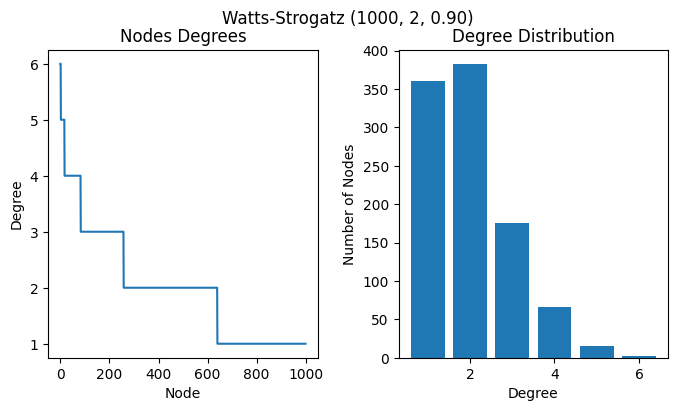

Graph with 1000 nodes and 1000 edges
Diameter: 66
Clustering coefficient: 0.0



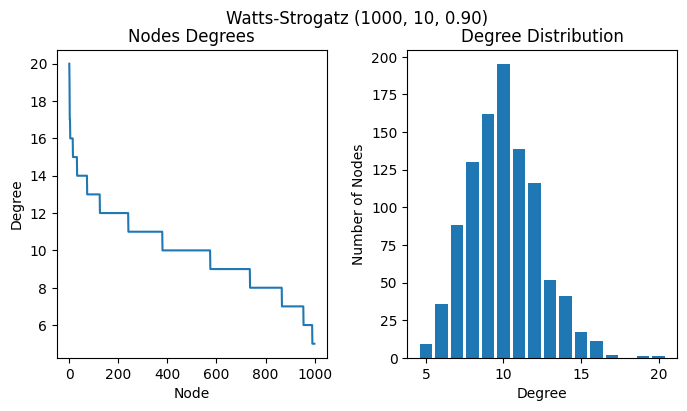

Graph with 1000 nodes and 5000 edges
Diameter: 5
Clustering coefficient: 0.008683944976592039



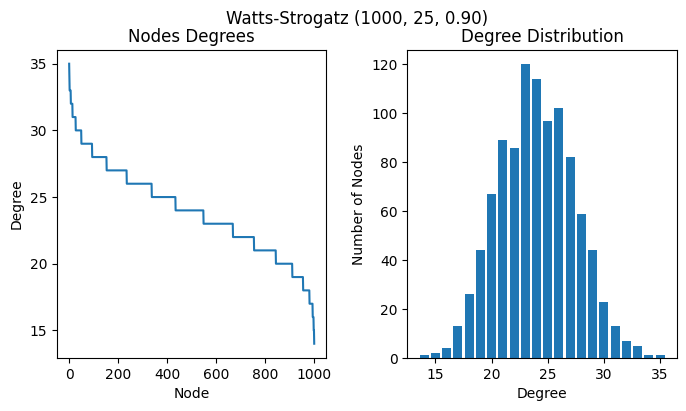

Graph with 1000 nodes and 12000 edges
Diameter: 4
Clustering coefficient: 0.023881583458096756



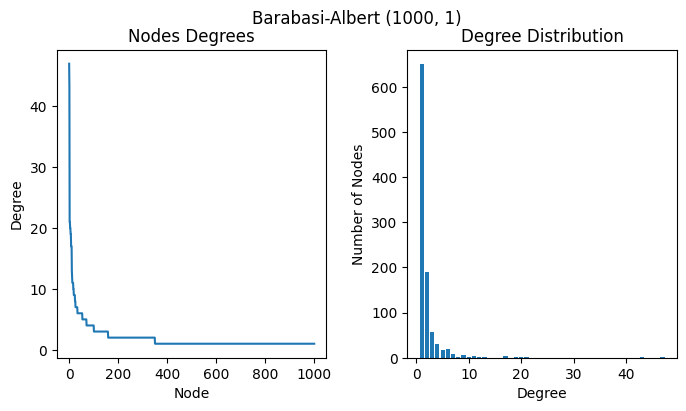

Graph with 1000 nodes and 999 edges
Diameter: 18
Clustering coefficient: 0.0



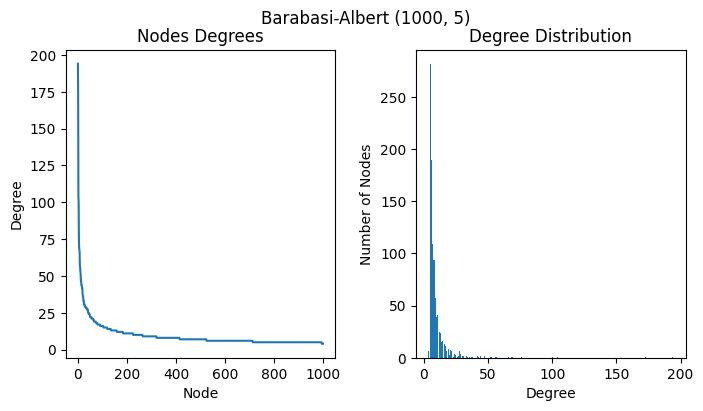

Graph with 1000 nodes and 4878 edges
Diameter: 5
Clustering coefficient: 0.05215843303360765



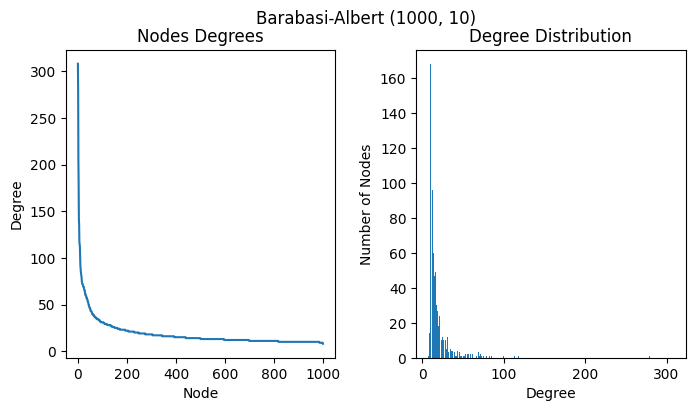

Graph with 1000 nodes and 9636 edges
Diameter: 4
Clustering coefficient: 0.07971400170739508



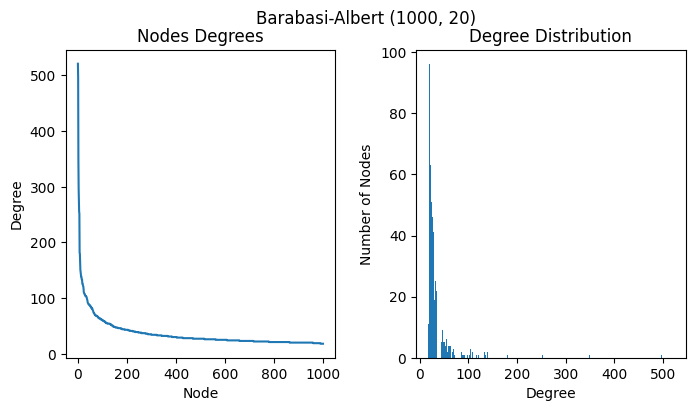

Graph with 1000 nodes and 18436 edges
Diameter: 3
Clustering coefficient: 0.12503532909223236



In [5]:
# We fix the node's number to 10000, which is enough to show emergent properties
N = 1000

# First we test the Erdos-Renyi model with different values of p
for p in np.arange(0.1, 1, 0.2):
  G = erdosRenyi(N, p)
  computeMetrics(G, f'Erdos-Renyi ({N},{p:.2f})')

# Then the Watts-Strogatz model with different values of k and beta
for beta in np.arange(0.3, 1, 0.3):
  for k in [2, 10, 25]:
    #G = wattsStrogatz(N, k, beta)
    G = nx.watts_strogatz_graph(N, k, beta)
    computeMetrics(G, f'Watts-Strogatz ({N}, {k}, {beta:.2f})')

# Finally the Barabasi-Albert model with different values of l
for l in [1, 5, 10, 20]:
  G = barabasiAlbert(N, l)
  computeMetrics(G, f'Barabasi-Albert ({N}, {l})')

# 2. Small-World Graph Analysis

In [ ]:
# The following it's the implementation of the random graph model used to compute some metrics and for comparison
def smallWorld(n, p):
  G = nx.DiGraph()
  G.add_node(1)
  G.add_node(n + 1)

  for i in range(1, n + 1):
    if (i != n):
      G.add_node(i)
    G.add_edge(i - 1, i % n, weight=1)
    draw = np.random.rand()
    if (draw <= p):
      G.add_edge(i - 1, n + 1, weight=0.5)
      G.add_edge(n + 1, i - 1, weight=0.5)

  return G

In [ ]:
n = 1000

def P_l(l, p):
  return ((n - l - 1) * l * p ** 2 * (1 - p) ** (l - 1) + (l + 1) * p * (1 - p) ** l + (1 - p) ** (l + 1)) / (n - 1)

def averageShortestPath():
  print('Average shortest path')
  for i in [5, 10, 100, 1000, 10000]:
    print(f'n={i}')
    for p in np.arange(0.1, 1, 0.2):
      E = sum([P_l(l, p) * l for l in range(i)])
      print(f'\tp={round(p,1)} E[s] = {E}')


def plotShortestPaths():
  plt.xlabel('Length')
  plt.ylabel('Number of Shortest Paths')
  plt.xticks(range(0, int(n), 5))
  plt.xlim(0, n / 30)


  for p in np.arange(0.1, 1, 0.2):
    x = [i for i in range(n)]
    pl = [(n * (n - 1)) * P_l(l, p) for l in range(n)]
    plt.plot(x, pl, label=f'p={round(p, 1)}')

  plt.legend()
  plt.show()

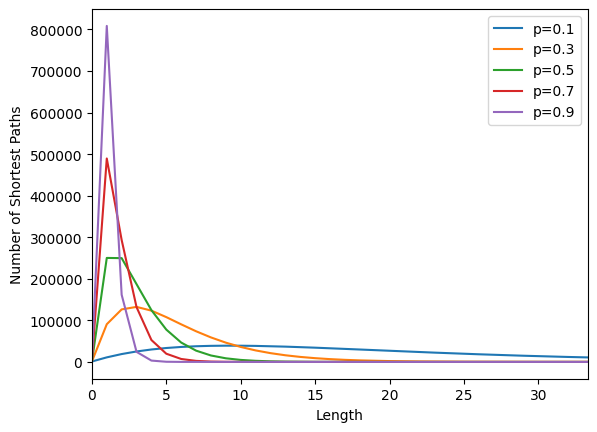

Average shortest path
n=5
	p=0.1 E[s] = 0.24423269269269274
	p=0.3 E[s] = 1.2356083883883886
	p=0.5 E[s] = 1.8109984984984986
	p=0.7 E[s] = 1.6841904104104102
	p=0.9 E[s] = 1.2183889289289285
n=10
	p=0.1 E[s] = 1.5545876455764769
	p=0.3 E[s] = 3.725417494728829
	p=0.5 E[s] = 2.873104549862362
	p=0.7 E[s] = 1.8523825957698694
	p=0.9 E[s] = 1.220739166577477
n=100
	p=0.1 E[s] = 18.687960638232273
	p=0.3 E[s] = 5.639973306638665
	p=0.5 E[s] = 2.9919919919919895
	p=0.7 E[s] = 1.8538742824457104
	p=0.9 E[s] = 1.2207392577762948
n=1000
	p=0.1 E[s] = 18.71971971971974
	p=0.3 E[s] = 5.63997330663997
	p=0.5 E[s] = 2.9919919919919895
	p=0.7 E[s] = 1.8538742824457104
	p=0.9 E[s] = 1.2207392577762948
n=10000
	p=0.1 E[s] = 18.71971971971974
	p=0.3 E[s] = 5.63997330663997
	p=0.5 E[s] = 2.9919919919919895
	p=0.7 E[s] = 1.8538742824457104
	p=0.9 E[s] = 1.2207392577762948


In [ ]:
plotShortestPaths()
averageShortestPath()

In [ ]:
S = 100
n = 100
p = 0.2

def computeAverageDistance():
  path_length_counts = {}
  total_distance = 0

  for s in tqdm(range(S)):
    G = smallWorld(n, p)
    shortest_path_lengths = dict(nx.shortest_path_length(G))

    for sources, targets in shortest_path_lengths.items():
      for target, length in targets.items():
        total_distance += length
        if length not in path_length_counts:
          path_length_counts[length] = 1
        else:
          path_length_counts[length] += 1


  pairs_count = s * len(G) * (len(G) - 1)
  path_length_probs = {}
  for length, count in path_length_counts.items():
    path_length_probs[length] = count / pairs_count

  # We first find the average distance in the generated graph
  average_distance = total_distance / pairs_count

  probs = []
  counts = []

  for length, count in path_length_probs.items():
    probs.append(length)
    counts.append(count)


  plt.plot(probs, counts, label='Simulated')

  # Then we compute the average distance using the formula we have found to compare both the results
  plt.plot([i for i in range(n)], [P_l(l, p) for l in range(n)], label='Computed')

  plt.title('Shortest path probability distribution')
  plt.xlabel('Length')
  plt.ylabel('Probability')
  plt.legend()
  plt.xticks(range(0, n, 5))


  print(f'average distance: {average_distance}\n')

  0%|          | 0/100 [00:00<?, ?it/s]

average distance: 9.689420942094209



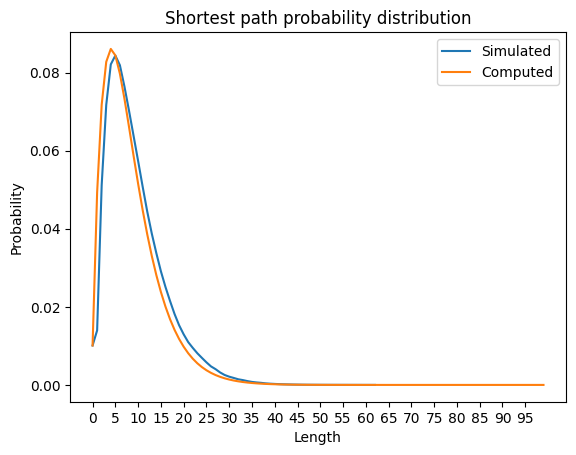

In [ ]:
computeAverageDistance()

# 3. Densest Subgraphs, Cuts and Cheeger's Inequality
We want to analyze the following graph:

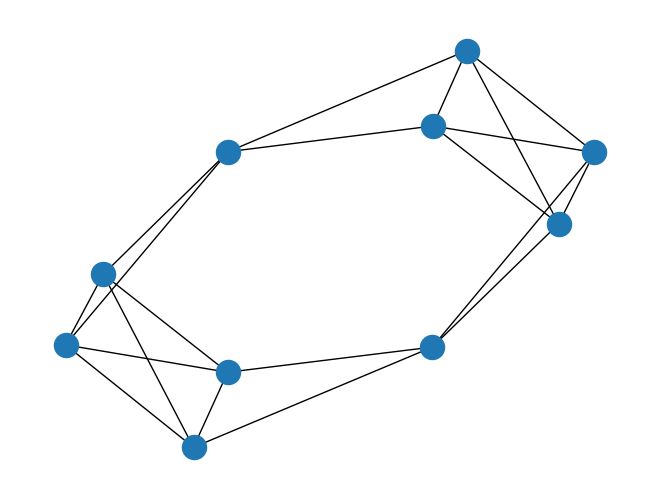

In [ ]:
# Create and plot the graph proposed
G = nx.empty_graph(9)
G.add_edge(0, 1)
G.add_edge(0, 2)
G.add_edge(0, 3)
G.add_edge(0, 6)

G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 4)

G.add_edge(2, 3)
G.add_edge(2, 6)

G.add_edge(3, 4)

G.add_edge(4, 5)
G.add_edge(4, 8)

G.add_edge(5, 7)
G.add_edge(5, 8)
G.add_edge(5, 9)

G.add_edge(6, 7)
G.add_edge(6, 9)

G.add_edge(7, 8)
G.add_edge(7, 9)

G.add_edge(8, 9)

nx.draw(G)

Here we implement the approximation algorithm for the **densest subgraph** of $G$, and compare the results with the optimal solution of a brute force algorithm.

optimal densest cut sparsity: 2.0, greedy solution sparsity: 2.0



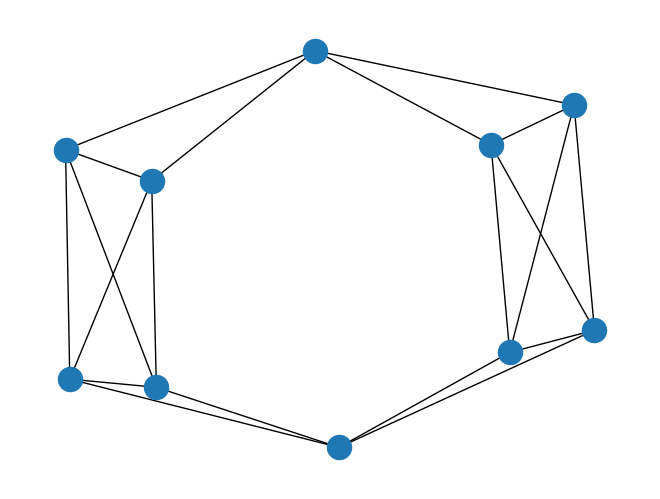

In [ ]:
from itertools import combinations

def density(G, S):
  GS = G.subgraph(S)
  return GS.number_of_edges()/len(S)

# Approximated greedy algorithm
def greedyDensestSubgraph(G):
  S = list(G)
  SG = list(G)

  while(len(S) > 1):
    GS = G.subgraph(S)
    min_degree_node, min_degree = min((node, degree) for node, degree in G.degree(S))
    S.remove(min_degree_node)

    if(density(G, S) >= density(G, SG)):
      SG = S

  return G.subgraph(SG)

# Brute force the solution to compare
def densestSubgraph(G):
  cuts = []
  for r in range(1, len(list(G))+1):
      cuts += list(combinations(list(G), r))
  max_sparsity = 0
  best_cut = None
  for cut in cuts:
    spars = density(G, cut)
    if spars > max_sparsity:
      max_sparsity = spars
      best_cut = cut
  return G.subgraph(best_cut)

densestSubGraph_greedy = greedyDensestSubgraph(G)
densestSubGraph = densestSubgraph(G)

print(f'optimal densest cut sparsity: {density(densestSubGraph, list(densestSubGraph))}, greedy solution sparsity: {density(densestSubGraph_greedy, list(densestSubGraph_greedy))}\n')

nx.draw(densestSubGraph_greedy)

To show the Cheeger's inequality holds for the graph, we need to calculate the **second eigenvalue** $\lambda_2$ of the **normalized Laplacian** $\mathcal{L}(G)$ of $G$, which we can calculate as $$\frac{(D-A)}{4}$$ since the graph is $4$-regular, and to find its **conductance**.

In [ ]:
A = nx.adjacency_matrix(G)
print(f'A :\n {A.todense()}')
D = np.diag(np.sum(A, axis=1))
print(f'D :\n {D}')
L = (D - A)/4
print(f'L :\n {L}')

A :
 [[0 1 1 1 0 0 1 0 0 0]
 [1 0 1 1 1 0 0 0 0 0]
 [1 1 0 1 0 0 1 0 0 0]
 [1 1 1 0 1 0 0 0 0 0]
 [0 1 0 1 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 1 1 1]
 [1 0 1 0 0 0 0 1 0 1]
 [0 0 0 0 0 1 1 0 1 1]
 [0 0 0 0 1 1 0 1 0 1]
 [0 0 0 0 0 1 1 1 1 0]]
D :
 [[4 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 4]]
L :
 [[ 1.   -0.25 -0.25 -0.25  0.    0.   -0.25  0.    0.    0.  ]
 [-0.25  1.   -0.25 -0.25 -0.25  0.    0.    0.    0.    0.  ]
 [-0.25 -0.25  1.   -0.25  0.    0.   -0.25  0.    0.    0.  ]
 [-0.25 -0.25 -0.25  1.   -0.25  0.    0.    0.    0.    0.  ]
 [ 0.   -0.25  0.   -0.25  1.   -0.25  0.    0.   -0.25  0.  ]
 [ 0.    0.    0.    0.   -0.25  1.    0.   -0.25 -0.25 -0.25]
 [-0.25  0.   -0.25  0.    0.    0.    1.   -0.25  0.   -0.25]
 [ 0.    0.    0.    0.    0.   -0.25 -0.25  1.   -0.25 -0.25]
 [ 0.    0.    0.  

Since the graph is small, we can use a simple brute force algorithm to find a minimum cut

In [ ]:
# Auxiliary function
def find_all_cuts(G, minsize=0):
    cuts = []
    for i in range(1, len(G)):
        for comb in combinations(G.nodes(), i):
            S = set(comb)
            if (len(S) >= minsize and len(set(G) - S) >= minsize):
              cut = (S, set(G) - S)
              cuts.append(cut)
    return cuts


def minCut(G, minsize=0):
  best_cut = None
  best_num_edges = np.inf
  for cut in find_all_cuts(G, minsize):
    S, T = cut[0], cut[1]
    num_edges_cut = nx.cut_size(G, S)
    if num_edges_cut < best_num_edges:
      best_cut = cut
      best_num_edges = num_edges_cut
  return best_cut, best_num_edges


def sparsestCut(G):
  best_cut = None
  best_ratio = np.inf
  for cut in find_all_cuts(G):
    S, T = cut[0], cut[1]
    num_edges_cut = nx.cut_size(G, S)
    size_S = len(S)
    size_T = len(T)
    ratio = num_edges_cut / min(size_S, size_T)
    if ratio < best_ratio:
      best_ratio = ratio
      best_cut = cut
  return best_cut, best_ratio

def findConductance(G):
  best_conductance = np.inf
  best_partition = None
  for cut in find_all_cuts(G):
    S, T = cut[0], cut[1]
    num_edges_cut = nx.cut_size(G, S)
    degree_S = sum(G.degree(i) for i in S)
    degree_T = sum(G.degree(i) for i in T)
    conductance = num_edges_cut / min(degree_S, degree_T)
    if conductance < best_conductance:
      best_conductance = conductance
      best_partition = cut
  return best_conductance, best_partition

Now we compute everything we have implemented

In [ ]:
minimum_cut, _ = minCut(G)
print(f'Minimum cut: {minimum_cut}')

minimum_cut, _ = minCut(G, int(len(set(G))/2))
print(f'Minimum cut with at least half nodes: {minimum_cut}')

sparsest_cut, _ = sparsestCut(G)
print(f'Sparsest cut: {sparsest_cut}')

conductance, partition = findConductance(G)
print(f'Conductance: {conductance}')

# Here we compute the eigenvalues of L
e = sorted(np.linalg.eigvals(L))
lambda_2 = e[1]
print(f'λ2: {np.round(lambda_2, 2)}')


print(f'Cheeger\'s inequality holds: {lambda_2/2 <= conductance and conductance<= np.sqrt(2 * lambda_2)}')
print(f'Partiton that satisfies Cheeger\'s inequality: {partition}')

Minimum cut: ({0}, {1, 2, 3, 4, 5, 6, 7, 8, 9})
Minimum cut with at least half nodes: ({0, 1, 2, 3, 4}, {5, 6, 7, 8, 9})
Sparsest cut: ({0, 1, 2, 3, 4}, {5, 6, 7, 8, 9})
Conductance: 0.2
λ2: (0.25+0j)
Cheeger's inequality holds: True
Partiton that satisfies Cheeger's inequality: ({0, 1, 2, 3, 4}, {5, 6, 7, 8, 9})


# 5. GNN for Node Classification
In this section we are going to perform node classification on the LastFMAsia dataset, which represents friendships between Asia users of the popular radio service.

We use three different networks: simple GCN, SAGE and GAT.

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os

def format_pytorch_version(version):
    return version.split('+')[0]

def format_cuda_version(version):
    return 'cu' + version.replace('.', '')

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)
CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html --quiet
import torch_geometric as pygeom

from torch_geometric.data import Data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.9/884.9 kB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 20.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


### 5.1 Networks Implementation
After importing some libraries, we create the three networks using ReLU as activation for GCN and SAGE and ELU for GAT and a lot of dropout.

In [22]:
class GCN(nn.Module):
  # Adding too many layers slows the training and doesn't improve the accuracy much, I found that 2 is the optimal tradeoff between performance and accuracy
  def __init__(self, inputs, outputs, conv_hidden=64, fc_hidden=32, layers=2, dropout=0.5, activation=nn.ReLU(), layer_type=pygeom.nn.GCNConv):
    super(GCN, self).__init__()
    self.inputs = inputs
    self.outputs = outputs
    self.conv_hidden = conv_hidden
    self.fc_hidden = fc_hidden
    self.layers = layers
    self.dropout = dropout
    self.activation = activation
    self.layer_type = layer_type

    self.conv_layers = nn.ModuleList()
    self.conv_layers.append(self.layer_type(inputs, conv_hidden))

    for _ in range(layers - 1):
      self.conv_layers.append(self.layer_type(conv_hidden, conv_hidden))

    self.linear1 = nn.Linear(conv_hidden, fc_hidden)
    self.linear2 = nn.Linear(fc_hidden, outputs)

  def forward(self, h, edge_index):
    h = F.dropout(h, self.dropout, training=self.training)

    for conv_layer in self.conv_layers:
      h = self.activation(conv_layer(h, edge_index))

    h = F.dropout(h, self.dropout, training=self.training)
    h = self.activation(self.linear1(h))
    h = self.linear2(h)

    return F.log_softmax(h, dim=1)

In [21]:
class GAT(nn.Module):
  def __init__(self, inputs, outputs, hidden=16, heads=16, dropout=0.5, alpha=0.2, activation=nn.ELU()):
    super(GAT, self).__init__()
    self.inputs = inputs
    self.outputs = outputs
    self.hidden = hidden
    self.heads = heads
    self.dropout = dropout
    self.alpha = alpha
    self.activation = activation # ELU seems to perform better than LeakyReLU

    # Both layers are not sensible to bias, but they are to dropout
    self.GAT_layer1 = pygeom.nn.GATConv(in_channels=self.inputs, out_channels=self.hidden, heads=self.heads, droupout=self.dropout, negative_slope=self.alpha, add_self_loops=True, bias=False)
    self.GAT_layer2 = pygeom.nn.GATConv(in_channels=self.hidden * heads, out_channels=self.outputs, droupout=self.dropout, negative_slope=self.alpha, add_self_loops=True, bias=False)


  def forward(self, h, edge_index):
    h = F.dropout(h, self.dropout, training=self.training)

    h = self.GAT_layer1(h, edge_index)
    h = F.dropout(h, self.dropout, training=self.training)

    h = self.activation(h)

    h = self.GAT_layer2(h, edge_index)

    return F.log_softmax(h, dim=1)


### 5.2 Downloading and visualizing the dataset

In [5]:
from torch_geometric.datasets import LastFMAsia
#dataset = SNAPDataset("./facebook", name='ego-facebook').data
dataset = LastFMAsia("./lastFMAsia").data

Processing...
Done!
/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:157: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


After downloading the dataset, we create the train/val/test split and masks

In [6]:
num_samples = dataset.x.shape[0]
perm = torch.randperm(num_samples)

num_train_samples = int(0.7 * num_samples)
num_val_samples = int(0.2 * num_samples)
num_test_samples = num_samples - num_val_samples - num_train_samples

train_mask = torch.zeros(num_samples, dtype=torch.bool)
val_mask =  torch.zeros(num_samples, dtype=torch.bool)
test_mask = torch.zeros(num_samples, dtype=torch.bool)

train_mask[perm[:num_train_samples]] = True
val_mask[perm[num_train_samples:num_train_samples + num_val_samples]] = True
test_mask[perm[num_train_samples + num_val_samples:]] = True

dataset.train_mask = train_mask
dataset.val_mask = val_mask
dataset.test_mask = test_mask

and then we print some stats

In [7]:
features = dataset.x.shape[1]
classes = dataset.y.bincount().shape[0]
edge_index = dataset.edge_index

inputs = dataset.x
labels = dataset.y

print(f'Nodes: {dataset.x.shape[0]}\nEdges: {int(edge_index.shape[1]/2)}\nFeatures: {features}\nClasses: {classes}\n')
print(f'Training Samples: {dataset.train_mask.sum()}\nEvaluation Samples: {dataset.val_mask.sum()}\nTest Sampling: {dataset.test_mask.sum()}')

Nodes: 7624
Edges: 27806
Features: 128
Classes: 18

Training Samples: 5336
Evaluation Samples: 1524
Test Sampling: 764


We now visualize the graph

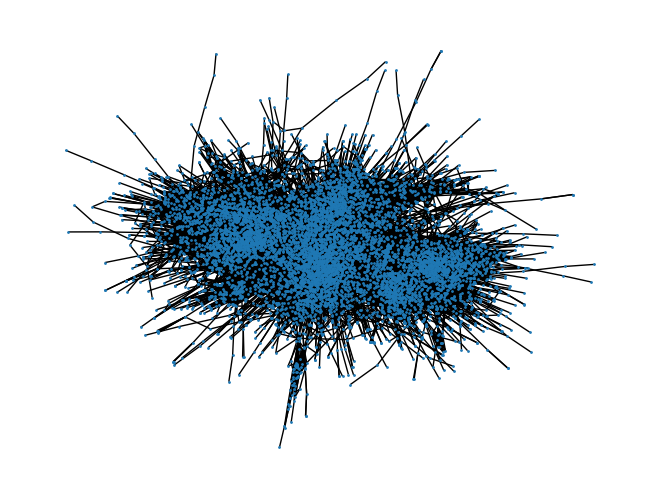

In [8]:
edges = [(src.item(), dst.item()) for src, dst in zip(dataset.edge_index[0], dataset.edge_index[1])]

G = nx.Graph()
G.add_edges_from(edges)

nx.draw(G, with_labels=False, node_size=1)

The graph is to big and connected to grasp some informations, visualizing the node's degree and distribution can be more useful

Text(0.5, 1.0, 'Distribution of Nodes Degree')

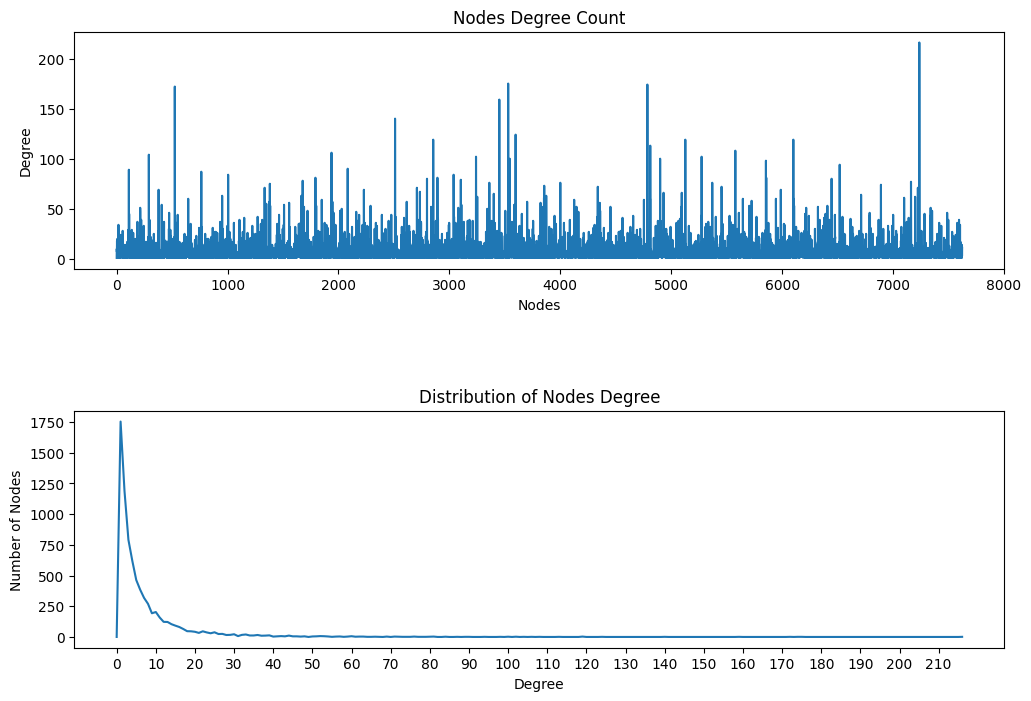

In [9]:
nodes_degrees = torch.bincount(edge_index[0]).numpy()

degree_count = np.zeros(np.max(nodes_degrees) + 1)
for degree in nodes_degrees:
  degree_count[degree] += 1

fig = plt.figure(figsize=(12,8), dpi=100)
fig.subplots_adjust(hspace=0.6)

plt.subplot(211)
plt.plot(nodes_degrees)
plt.xlabel('Nodes')
plt.ylabel('Degree')
plt.title('Nodes Degree Count')

plt.subplot(212)
plt.plot(degree_count)
plt.xticks(np.arange(0, len(degree_count), 10.0))
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Distribution of Nodes Degree')

We can see that the degree count is somewhat consistent, and its distribution it's, as usual, following some sort of power law.

### 5.3 Training
We use Adam as optimizer, the latest dynamic learning rate from OpenAI and L2 Regularization.
Also we employ early stopping.

In [10]:
def get_default_device():
    """Picking GPU if available or else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
device = get_default_device()

In [23]:
from torch.optim.lr_scheduler import CosineAnnealingLR

START_LR = 0.005
DECAY = 5e-4 # L2 Regularization

def initialize_model(network):

  print(f'Initializing {network}...\n')

  if network == 'GCN':
      model = GCN(features, classes, layers=4)
  elif network == 'SAGE':
    model = GCN(features, classes, layers=4, layer_type=pygeom.nn.SAGEConv)
  elif network == 'GAT':
    model= GAT(features, classes)

  print(f'Trainable parameters: {sum(p.numel() for p in model.parameters())}')

  device = get_default_device()
  model.to(device)

  optimizer = torch.optim.Adam(model.parameters(), lr=START_LR, weight_decay=DECAY)
  criterion = nn.CrossEntropyLoss()
  scheduler = CosineAnnealingLR(optimizer, T_max=30, eta_min=1e-4) # OpenAI dynamic learning rate to optimize convergence
  return model, optimizer, criterion, scheduler

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def accuracy(outputs, labels):
  preds = outputs.argmax(dim=1)
  correct = preds == labels
  correct = correct.sum()
  return correct / len(labels)

def confusion_m(outputs, labels):
  preds = outputs.argmax(dim=1)
  cm = confusion_matrix(labels, preds)
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.title(f'Confusion Matrix')
  plt.show()

def train(model, optimizer, criterion, scheduler):
  model.train()
  optimizer.zero_grad()

  outputs = model(inputs, edge_index)
  loss = criterion(outputs[dataset.train_mask], labels[dataset.train_mask])
  acc = accuracy(outputs[dataset.train_mask], labels[dataset.train_mask])

  loss.backward()
  optimizer.step()
  scheduler.step()
  return loss, acc

def eval(model, criterion):
  model.eval()
  outputs = model(inputs, edge_index)
  loss = criterion(outputs[dataset.val_mask], labels[dataset.val_mask])
  acc = accuracy(outputs[dataset.val_mask], labels[dataset.val_mask])
  return loss, acc

def test(model, criterion, state_dict=None):
  if state_dict != None:
    model.load_state_dict(state_dict)

  model.eval()
  outputs = model(inputs, edge_index)
  loss = criterion(outputs[dataset.test_mask], labels[dataset.test_mask])
  acc = accuracy(outputs[dataset.test_mask], labels[dataset.test_mask])
  #confusion_m(outputs[dataset.test_mask].detach(), labels[dataset.test_mask])
  return loss, acc


In [25]:
import time

EPOCHS = 100
gcns = ['GCN', 'SAGE', 'GAT']
losses = {}
accuracies = {}

def train_networks():

  for network in gcns:
    best_epoch = 0
    best_loss = np.inf
    best_state_dict = None
    losses[network] = []
    accuracies[network] = []
    model, optimizer, criterion, scheduler = initialize_model(network)

    print(f'Starting Training using {network}')

    start_time = time.time()

    for epoch in tqdm(range(EPOCHS)):
      train(model, optimizer, criterion, scheduler)
      loss, acc = eval(model, criterion)
      losses[network].append(loss.detach())
      accuracies[network].append(acc.detach())

      # Early Stopping
      if loss <= best_loss:
        best_loss = loss
        best_epoch = epoch
        best_state_dict = model.state_dict()

      if epoch % 10 == 0 or epoch == EPOCHS - 1:
        print(f'epoch: {epoch:03d} \t loss: {loss:.2f} \t acc: {acc:.2f} \t LR: {optimizer.param_groups[0]["lr"]:.4f}')

    end_time = time.time()

    print(f'\nFinished Training on {network}, elapsed time: {end_time - start_time:.2f}s\n')

    loss, acc = test(model, criterion, state_dict=best_state_dict)

    print(f'{network} test set results:\nLoss = {loss:.2f}\nAccuracy = {acc:.2f}\n')


In [26]:
train_networks()

Initializing GCN...

Trainable parameters: 23410
Starting Training using GCN


  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 000 	 loss: 2.84 	 acc: 0.11 	 LR: 0.0050
epoch: 010 	 loss: 1.95 	 acc: 0.46 	 LR: 0.0035
epoch: 020 	 loss: 1.57 	 acc: 0.51 	 LR: 0.0011
epoch: 030 	 loss: 1.51 	 acc: 0.53 	 LR: 0.0001
epoch: 040 	 loss: 1.43 	 acc: 0.54 	 LR: 0.0016
epoch: 050 	 loss: 1.15 	 acc: 0.69 	 LR: 0.0040
epoch: 060 	 loss: 0.91 	 acc: 0.76 	 LR: 0.0050
epoch: 070 	 loss: 0.78 	 acc: 0.80 	 LR: 0.0035
epoch: 080 	 loss: 0.72 	 acc: 0.82 	 LR: 0.0011
epoch: 090 	 loss: 0.71 	 acc: 0.82 	 LR: 0.0001
epoch: 099 	 loss: 0.71 	 acc: 0.82 	 LR: 0.0013

Finished Training on GCN, elapsed time: 21.76s

GCN test set results:
Loss = 0.74
Accuracy = 0.83

Initializing SAGE...

Trainable parameters: 43890
Starting Training using SAGE


  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 000 	 loss: 2.85 	 acc: 0.17 	 LR: 0.0050
epoch: 010 	 loss: 1.69 	 acc: 0.49 	 LR: 0.0035
epoch: 020 	 loss: 1.41 	 acc: 0.55 	 LR: 0.0011
epoch: 030 	 loss: 1.37 	 acc: 0.55 	 LR: 0.0001
epoch: 040 	 loss: 1.32 	 acc: 0.56 	 LR: 0.0016
epoch: 050 	 loss: 1.12 	 acc: 0.62 	 LR: 0.0040
epoch: 060 	 loss: 0.88 	 acc: 0.75 	 LR: 0.0050
epoch: 070 	 loss: 0.82 	 acc: 0.80 	 LR: 0.0035
epoch: 080 	 loss: 0.74 	 acc: 0.82 	 LR: 0.0011
epoch: 090 	 loss: 0.73 	 acc: 0.82 	 LR: 0.0001
epoch: 099 	 loss: 0.73 	 acc: 0.82 	 LR: 0.0013

Finished Training on SAGE, elapsed time: 19.02s

SAGE test set results:
Loss = 0.75
Accuracy = 0.82

Initializing GAT...

Trainable parameters: 37924
Starting Training using GAT


  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 000 	 loss: 2.13 	 acc: 0.51 	 LR: 0.0050
epoch: 010 	 loss: 0.81 	 acc: 0.80 	 LR: 0.0035
epoch: 020 	 loss: 0.70 	 acc: 0.82 	 LR: 0.0011
epoch: 030 	 loss: 0.69 	 acc: 0.82 	 LR: 0.0001
epoch: 040 	 loss: 0.67 	 acc: 0.83 	 LR: 0.0016
epoch: 050 	 loss: 0.63 	 acc: 0.83 	 LR: 0.0040
epoch: 060 	 loss: 0.57 	 acc: 0.85 	 LR: 0.0050
epoch: 070 	 loss: 0.55 	 acc: 0.87 	 LR: 0.0035
epoch: 080 	 loss: 0.54 	 acc: 0.86 	 LR: 0.0011
epoch: 090 	 loss: 0.54 	 acc: 0.86 	 LR: 0.0001
epoch: 099 	 loss: 0.54 	 acc: 0.86 	 LR: 0.0013

Finished Training on GAT, elapsed time: 57.38s

GAT test set results:
Loss = 0.62
Accuracy = 0.86



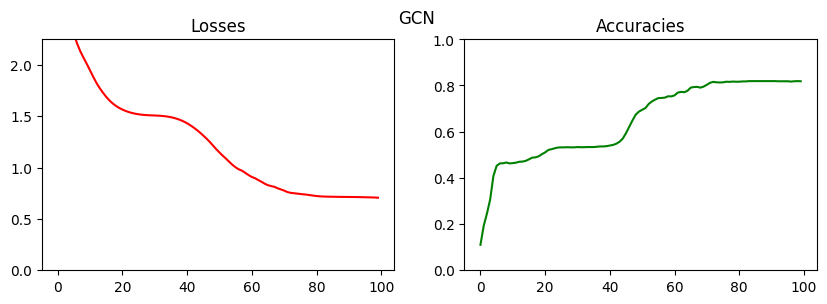

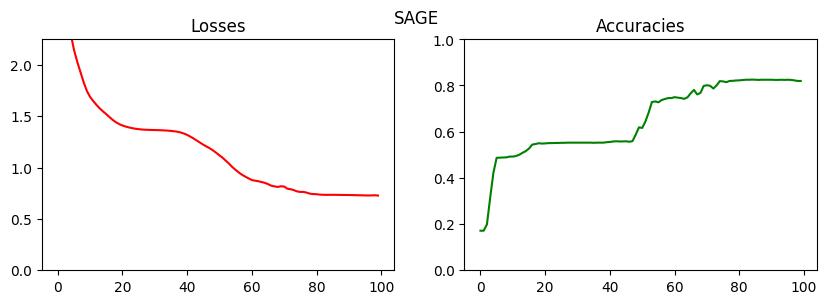

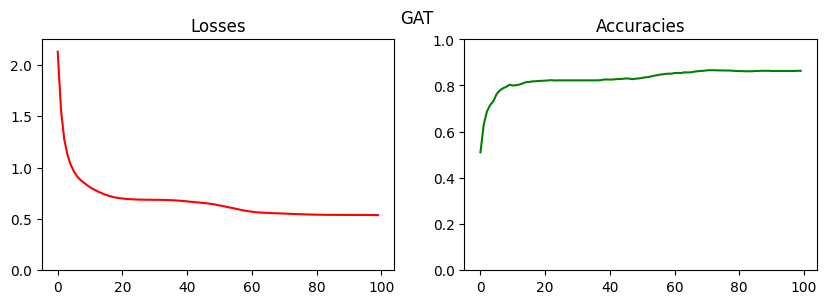

In [28]:
for network in gcns:
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
  fig.suptitle(network)
  ax1.plot(losses[network], c='red')
  ax2.plot(accuracies[network], c='green')
  ax1.set_ylim([0, 2.25])
  ax2.set_ylim([0, 1])
  ax1.set_title("Losses")
  ax2.set_title("Accuracies")

  fig.show()
